In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def point_charge_field(q, charge, point):
    
    vector1 = np.array(charge, dtype=float)
    vector2 = np.array(point, dtype=float)

    r_vector = vector2 - vector1
    r = np.linalg.norm(r_vector)

    if r == 0:
        return np.nan
    
    e = r_vector/r

    E = q / r**2
    
    return E * e

# E = point_charge_field(1, [0, 0, 0], [1, 0, 0])
# print(E)
# E = point_charge_field(-2, [1, 1, 1], [1, 1, 3])
# print(E) 

In [24]:
def point_charge_potential(q, charge, point):

    vector1 = np.array(charge, dtype=float)
    vector2 = np.array(point, dtype=float)

    r_vector = vector2 - vector1
    r = np.linalg.norm(r_vector)
    
    if r == 0:
        return np.nan
    
    return q / r

# phi = point_charge_potential(1, [0, 0, 0], [1, 0, 0])
# print(phi)
# phi = point_charge_potential(-2, [0, 0, 0], [0, 2, 0])
# print(phi) 

## Точечный заряд (монополь)

In [27]:
q = 1
charge_pos = [0, 0, 0]
step = 0.2

s = 7
size = 5
x = np.arange(-size, size+step/2, step)[::s]
y = np.arange(-size, size+step/2, step)[::s]
z = np.arange(-size, size+step/2, step)[::s]

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

Ex = np.zeros_like(X)
Ey = np.zeros_like(X)
Ez = np.zeros_like(X)
Phi = np.zeros_like(X)
E_mag = np.zeros_like(X)

points = []
E_vectors = []
E_magnitudes = []

for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            point = [x[i], y[j], z[k]]
            E_vec = point_charge_field(q, charge_pos, point)
            phi_val = point_charge_potential(q, charge_pos, point)
            Ex[i, j, k] = E_vec[0]
            Ey[i, j, k] = E_vec[1]
            Ez[i, j, k] = E_vec[2]
            Phi[i, j, k] = phi_val
            E_mag[i, j, k] = np.linalg.norm(E_vec)

            points.append(point)
            E_vectors.append(E_vec)
            E_magnitudes.append(np.linalg.norm(E_vec))

# print(Ex)
# print(Ey)
# print(Ez)
# print(Phi)

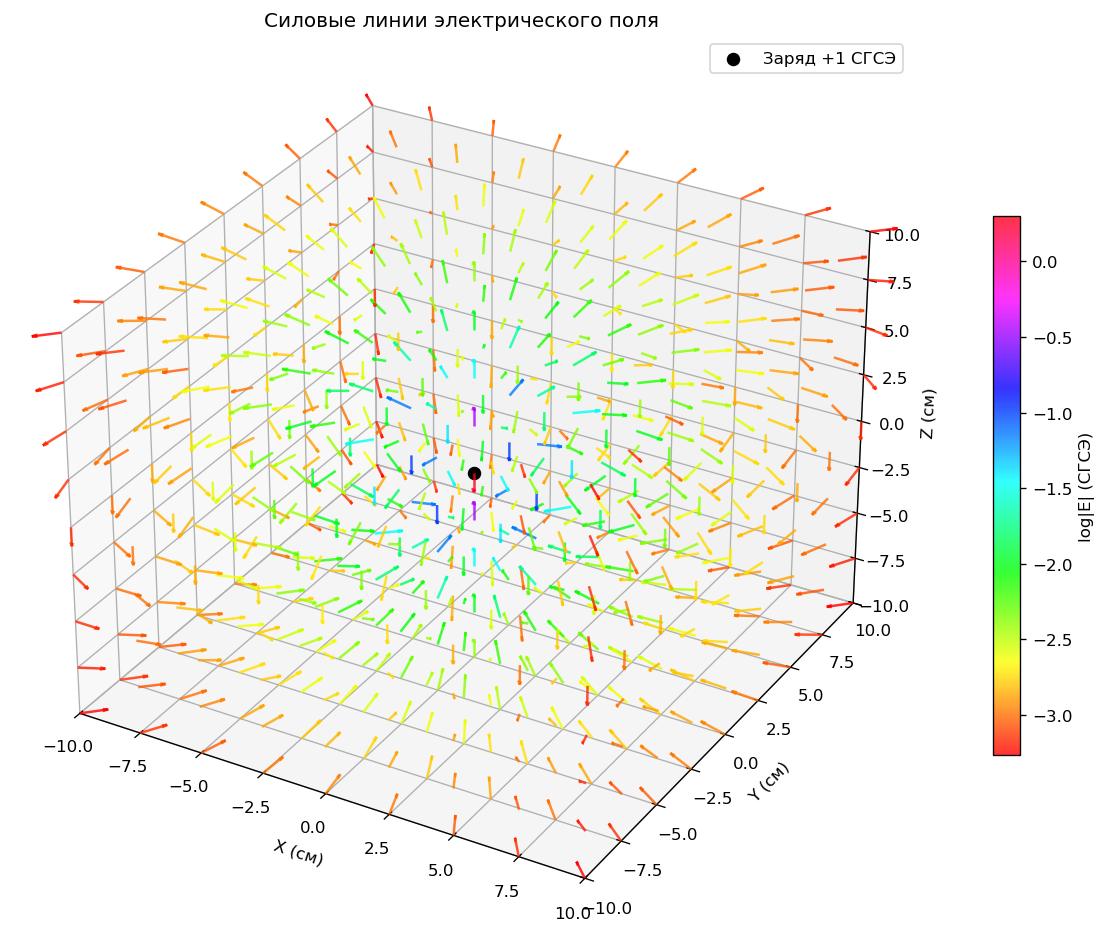

In [101]:
points = np.array(points)
E_vectors = np.array(E_vectors)
E_magnitudes = np.array(E_magnitudes)

# Логарифм величин поля для цветового отображения
E_log = np.log10(E_magnitudes + 1e-10)

fig = plt.figure(figsize=(14, 8), dpi=120)
ax1 = fig.add_subplot(111, projection='3d')

scale = 0.5
# Создаем quiver plot с одномерным массивом для цвета
quiver = ax1.quiver(
    points[:, 0], points[:, 1], points[:, 2],
    E_vectors[:, 0] * scale,
    E_vectors[:, 1] * scale,
    E_vectors[:, 2] * scale, 
    length=1.0, 
    normalize=True, 
    cmap='hsv', 
    alpha=0.8, 
    arrow_length_ratio=0.2, 
    array=E_log
)
    

ax1.scatter([0], [0], [0], color='black', s=50, label='Заряд +1 СГСЭ')
ax1.set_title('Силовые линии электрического поля')
ax1.set_xlabel('X (см)')
ax1.set_ylabel('Y (см)')
ax1.set_zlabel('Z (см)')
ax1.set_xlim(-size, size)
ax1.set_ylim(-size, size)
ax1.set_zlim(-size, size)
ax1.legend()

cbar = fig.colorbar(quiver, ax=ax1, shrink=0.6, aspect=20)
cbar.set_label('log|E| (СГСЭ)')

plt.tight_layout()

### Эквипотенциальные поверхности

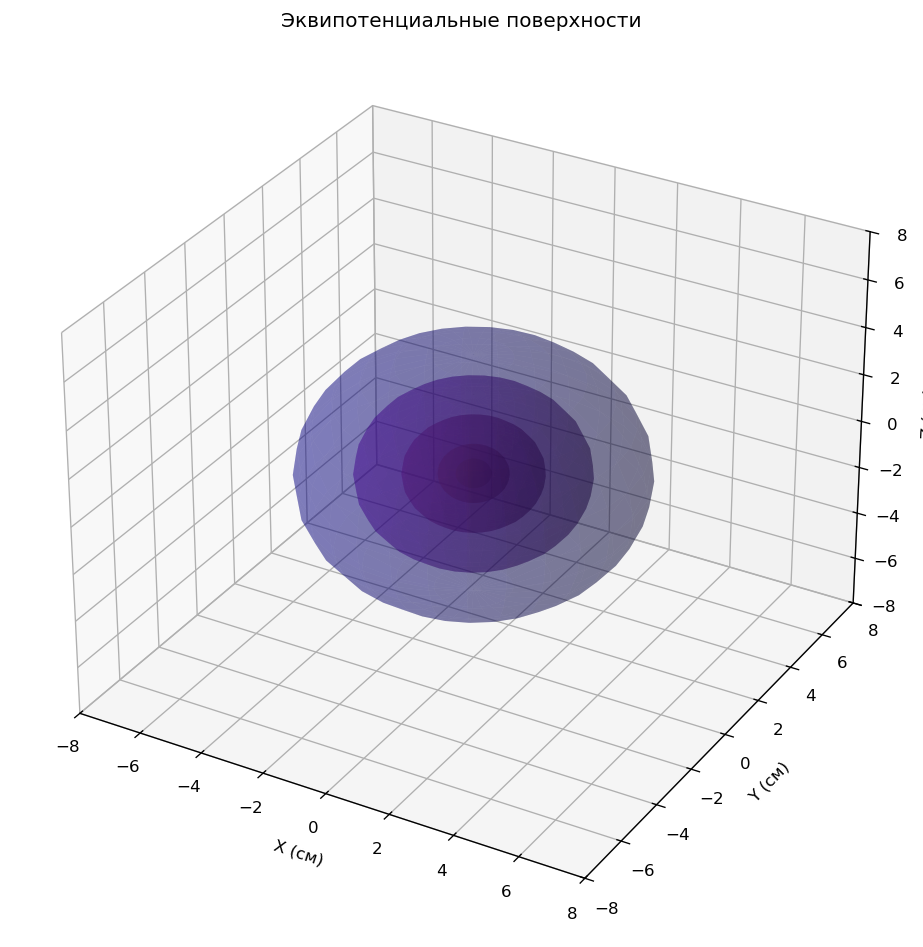

In [113]:
fig = plt.figure(figsize=(14, 8), dpi=120)
ax = fig.add_subplot(111, projection="3d")

levels = [0.2, 0.3, 0.5, 1.0, 2.0]

colors = plt.cm.plasma(np.linspace(0, 1, len(levels)))

for i, phi in enumerate(levels):
    r = q / phi
    if r > size: 
        continue

    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 15)
    x_sphere = r * np.outer(np.cos(u), np.sin(v))
    y_sphere = r * np.outer(np.sin(u), np.sin(v))
    z_sphere = r * np.outer(np.ones_like(u), np.cos(v))
    
    ax.plot_surface(x_sphere, y_sphere, z_sphere,
                    color=colors[i], alpha=0.3, linewidth=0)

ax.set_title('Эквипотенциальные поверхности')
ax.set_xlabel('X (см)')
ax.set_ylabel('Y (см)')
ax.set_zlabel('Z (см)')
ax.set_xlim(-size, size)
ax.set_ylim(-size, size)
ax.set_zlim(-size, size)

plt.tight_layout()

# Диполь

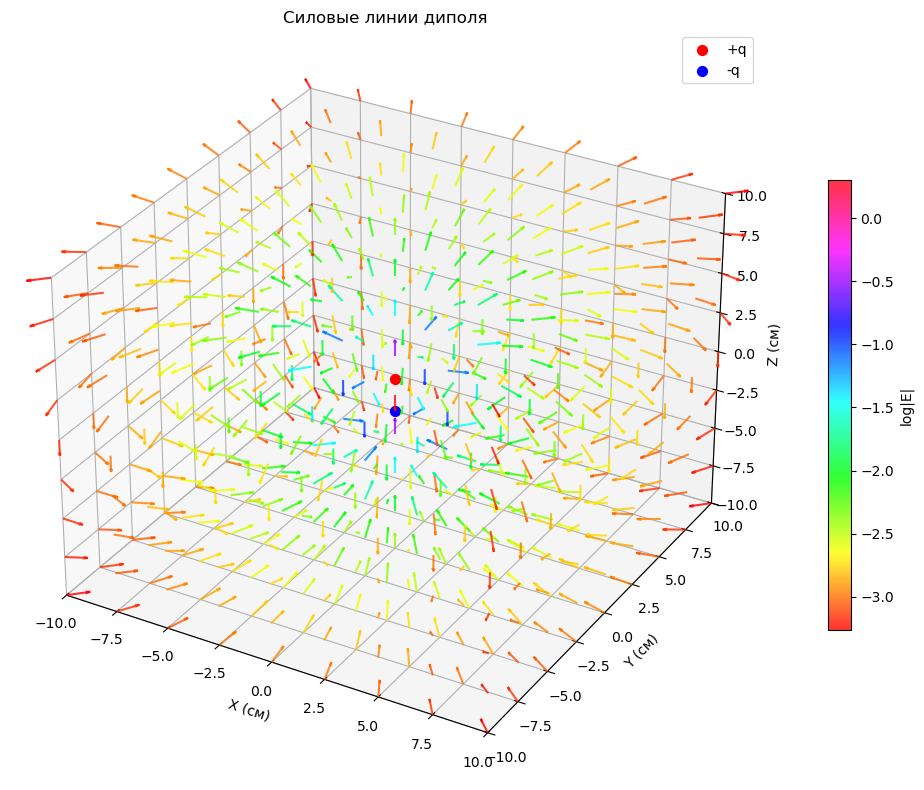

In [103]:
q = 1.0          
d = 2.0          
a  = [0, 0,  d/2]
b = [0, 0, -d/2]

step = 0.5
s = 5
size = 10

x = np.arange(-size, size + step/2, step)[::s]
y = np.arange(-size, size + step/2, step)[::s]
z = np.arange(-size, size + step/2, step)[::s]

points = []
E_vectors = []
E_magnitudes = []

for i in x:
    for j in y:
        for k in z:
            point = [i, j, k]

            E1 = point_charge_field(q, a, point)
            E2 = point_charge_field(-q, b, point)
            E_total = E1 + E2
            E_mag = np.linalg.norm(E_total)
            
            points.append(point)
            E_vectors.append(E_total)
            E_magnitudes.append(E_mag)

points = np.array(points)
E_vectors = np.array(E_vectors)
E_magnitudes = np.array(E_magnitudes)

E_log = np.log10(E_magnitudes + 1e-10)

fig = plt.figure(figsize=(14, 8), dpi=100)
ax1 = fig.add_subplot(111, projection='3d')

scale = 0.5
quiver = ax1.quiver(
    points[:, 0], points[:, 1], points[:, 2],
    E_vectors[:, 0] * scale,
    E_vectors[:, 1] * scale,
    E_vectors[:, 2] * scale,
    length=1.0,
    normalize=True,
    cmap='hsv',
    alpha=0.8,
    arrow_length_ratio=0.2,
    array=E_log
)

ax1.scatter([0], [0], [d/2], color='red', s=50, label='+q')
ax1.scatter([0], [0], [-d/2], color='blue', s=50, label='-q')

ax1.set_title('Силовые линии диполя')
ax1.set_xlabel('X (см)')
ax1.set_ylabel('Y (см)')
ax1.set_zlabel('Z (см)')
ax1.set_xlim(-size, size)
ax1.set_ylim(-size, size)
ax1.set_zlim(-size, size)
ax1.legend()

cbar = fig.colorbar(quiver, ax=ax1, shrink=0.6, aspect=20)
cbar.set_label('log|E|')

plt.tight_layout()